<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from scipy.io import loadmat  #libreria para cargar los archivos .mat 
import matplotlib.pyplot as plt
import os  #libreria para obtener los path 
from functools import reduce
import plotly.graph_objects as go

In [ ]:
## funcion para obtener los path de los diferentes archivos 
def get_file_paths(directory):
    file_paths = []
    for root, directories, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
    return file_paths

In [ ]:
## funcion para obtener las vibraciones.Se guardan en una lista 
def get_vibration_velocities(file_paths):
    all_vibration=[]
    all_time=[]
    for  i,paths in enumerate(file_paths):
        annots=loadmat(paths) #cargar el diccionario almacenado en el archivo .mat 
        indices_vibration=[0,0,1,0,0,0]  #indice asociado al array de las vibraciones 
        indices_started_time=[0,0,0,0,0,0,0,0] #indice asociado al valor incial a la cual empezo el sampleo 
        indices_increment=[0,0,0,0,0,1,0,0]#indice asociado al valor de incremento en el tiempo 
        indices_number_of_samples=[0,0,0,0,0,2,0,0]
    ##################################################################################
        vibration = reduce(lambda x, i: x[i], indices_vibration, annots['Signal']) #asignacion de los valores del array de vibraciones 
        started_time= reduce(lambda x, i: x[i], indices_started_time, annots['Signal']) #asignacion del punto de inicio 
        increment_time=reduce(lambda x, i: x[i], indices_increment, annots['Signal']) # asignacion del valor de incremento 
        number_of_samples=reduce(lambda x, i: x[i],indices_number_of_samples, annots['Signal'])
        final_value =  started_time + (increment_time* (number_of_samples - 1)) #calculo del valor final 
        time=np.linspace(started_time, final_value,  number_of_samples,endpoint=True) # 
        all_vibration.append(vibration)
        all_time.append(time) 
    return(all_vibration,all_time)     

In [ ]:
## funcion para obtener las graficas 
def graficador(all_vibration,all_time,file_paths):
    # number_of_graphics= int(input("Ingrese la cantidad de experimentos que desea ver, tenga en cuenta que son dos housing de rodamientos y que las medidas son el eje x y y: "))
    name=input('ingrese el nombre del archivo que desea ver')
    full_name="C:\\Users\\58424\\Downloads\\tesis-usb\\data set\\Vibration, acoustic, temperature, and motor\\data under variaty load condition\\vibration\\"+name
    try:
        # Find index of the input string
        index = file_paths.index(full_name)
        print("Index of string", name, "in the list:", index)
    except ValueError:
        print("String", name ,"not found in the list.")
    cont= int(input('Ingrese 1  si desea graficos interactivos 0 si no '))
    i=index
    
    if cont==0:
        
            fig, ax = plt.subplots()
            ax.grid(True)
            line=ax.plot(all_time[i],all_vibration[i][:,0])
            plt.ylabel('g ')
            plt.xlabel('[s]')
            title='Amplitud de las vibraciones en el eje x (housing A)'+file_paths[i][132:160]
            ax.set_title(title)
            plt.show()
      ######################333      
            fig, ax = plt.subplots()
            ax.grid(True)
            ax.plot(all_time[i],all_vibration[i][:,1])
            plt.ylabel('g ')
            plt.xlabel('[s]')
            title='Amplitud de las vibraciones en el eje y (housing A)'+file_paths[i][132:160]
            ax.set_title(title)
            plt.show()


            fig, ax = plt.subplots()
            ax.grid(True)
            ax.plot(all_time[i],all_vibration[i][:,2])
            plt.ylabel('g ')
            plt.xlabel('[s]')
            title='Amplitud de las vibraciones en el eje x (housing B)'+file_paths[i][132:160]
            ax.set_title(title)
            plt.show()


            fig, ax = plt.subplots()
            ax.grid(True)
            ax.plot(all_time[i],all_vibration[i][:,3])
            plt.ylabel('g ')
            plt.xlabel('[s]')
            title='Amplitud de las vibraciones en el eje y (housing B)'+file_paths[i][132:160]
            ax.set_title(title)
            plt.show()
            
            
    else:
            x = all_time[i]
            y1 = all_vibration[i][:,0]
            y2 = all_vibration[i][:,1]
            y3 = all_vibration[i][:,2]
            y4 = all_vibration[i][:,3]
            #figura 1 
            fig1  = go.Figure(data=go.Scatter(x=x, y=y1, mode='lines'))
            # Configure the layout
            fig1 .update_layout(
                title='Amplitud de las vibraciones en el eje x (housing A)'+file_paths[i][132:160],
                xaxis_title='[s]',
                yaxis_title='g ',
                hovermode='closest',
                dragmode='zoom',
            )
            
#             #figura 2
#             fig2 = go.Figure(data=go.Scatter(x=x, y=y2, mode='lines'))
#             # Configure the layout
#             fig2.update_layout(
#                 title='Amplitud de las vibraciones en el eje y (housing A)'+file_paths[i][132:160],
#                 xaxis_title='[s]',
#                 yaxis_title='g ',
#                 hovermode='closest',
#                 dragmode='zoom',
#             )
            
#             #figura 3 
#             # Create a line plot
#             fig3 = go.Figure(data=go.Scatter(x=x, y=y3 , mode='lines'))
#             # Configure the layout
#             fig3.update_layout(
#                 title='Amplitud de las vibraciones en el eje x (housing B)'+file_paths[i][132:160],
#                 xaxis_title='[s]',
#                 yaxis_title='g ',
#                 hovermode='closest',
#                 dragmode='zoom',
#             )
            
#             #figura 4
#             # Create a line plot
#             fig4 = go.Figure(data=go.Scatter(x=x, y=y4 , mode='lines'))
#             # Configure the layout
#             fig4.update_layout(
#                 title='Amplitud de las vibraciones en el eje y(housing B)'+file_paths[i][132:160],
#                 xaxis_title='[s]',
#                 yaxis_title='g ',
#                 hovermode='closest',
#                 dragmode='zoom',
#             )
            
            fig1.show()
#             fig2.show()
#             fig3.show()
#             fig4.show()



    # print("Numero de elementos del vector vibraciones ((housing A eje X):",all_vibration[i][:,0].shape)
    # print("Numero de elementos del vector vibraciones ((housing A eje Y):",all_vibration[i][:,1].shape)
    # print("Numero de elementos del vector vibraciones ((housing B eje X):",all_vibration[i][:,2].shape)
    # print("Numero de elementos del vector vibraciones ((housing B eje Y):",all_vibration[i][:,3].shape)
    # print("Numero de elementos del vector tiempo :",all_time[i].shape)
    return()
    
    

In [ ]:
directory_path='C:\\Users\\58424\\Downloads\\tesis-usb\\data set\\Vibration, acoustic, temperature, and motor\\data under variaty load condition\\vibration'
file_paths = get_file_paths(directory_path)
all_vibration,all_time=get_vibration_velocities(file_paths)

In [ ]:
file_paths[1]
all_vibration

NameError: name 'file_paths' is not defined

ingrese el nombre del archivo que desea ver 0Nm_Normal.mat


Index of string 0Nm_Normal.mat in the list: 9


Ingrese 1  si desea graficos interactivos 0 si no  0


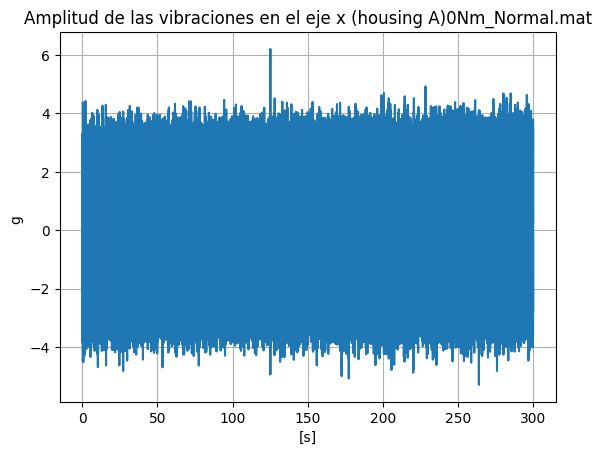

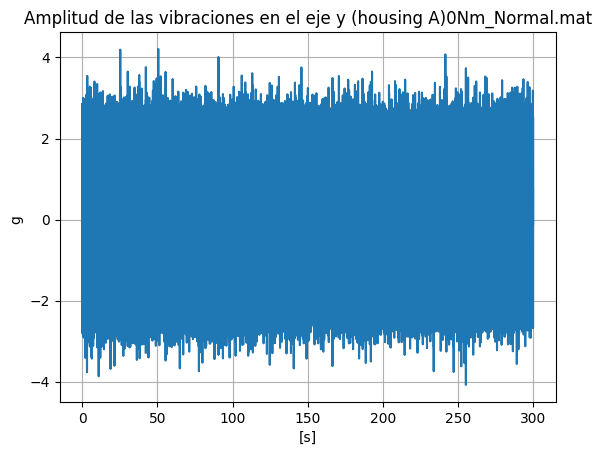

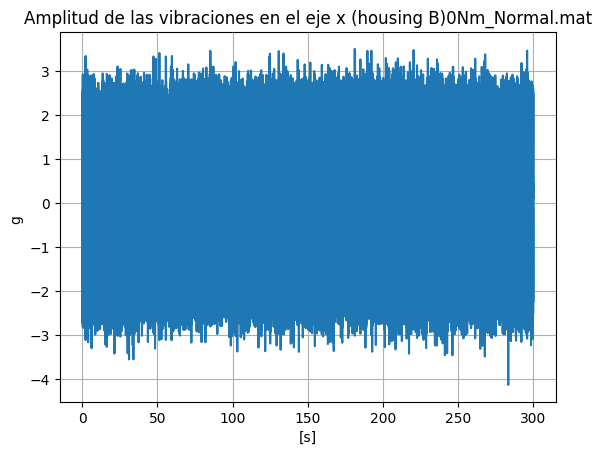

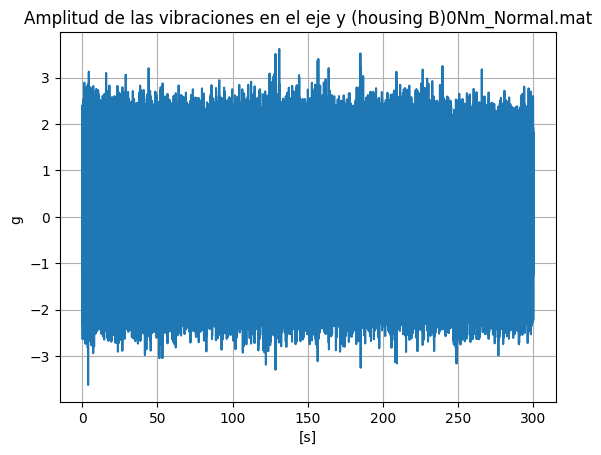

()

In [ ]:
graficador(all_vibration,all_time,file_paths )

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# Enable Bokeh to output plots in the notebook
output_notebook()

# Create sample data
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Create a figure
p = figure(title='Interactive Continuous Plot with Zooming',
           x_axis_label='X-axis', y_axis_label='Y-axis',
           width=500, height=300,
           tools='pan,wheel_zoom,box_zoom,reset')

# Add a line glyph to the figure
p.line(x, y, line_color='blue', line_width=2)

# Display the plot
show(p)

Loading BokehJS ...